In [43]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder#라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates#코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier#모델링 중 하나
#cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score#crossvaludation해주는거
from sklearn.metrics import *

from sklearn.model_selection import GridSearchCV#그리드서치
from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
#이거 임포트 해줘야 차트에서 오류안남!!! 한글파일때문에 오류나는거.
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Windows/Fonts/malgun.ttf'#윈도우안에있는 폰트파일주소.
#font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)


from sklearn.preprocessing import StandardScaler #표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)

In [57]:
df = pd.read_excel('./연관키워드 20220407 1645수정.xlsx')
df.head()

,연관키워드,월간검색수(PC),월간검색수(모바일),월평균클릭수(PC),월평균클릭수(모바일),월평균클릭률(PC),월평균클릭률(모바일),월평균노출 광고수,경쟁정도
0,여성의류,4720,22600,112.9,324.8,2.62,1.57,15,1
1,여성쇼핑몰,4910,21400,102.8,796.6,2.31,4.07,15,1
2,헤지스레이디스,3960,40400,69.2,848.8,1.98,2.26,15,1
3,여성의류쇼핑몰,6660,90700,289.7,5118.0,4.65,6.05,15,1
4,홈웨어,3800,26200,95.5,753.0,2.72,3.08,15,1


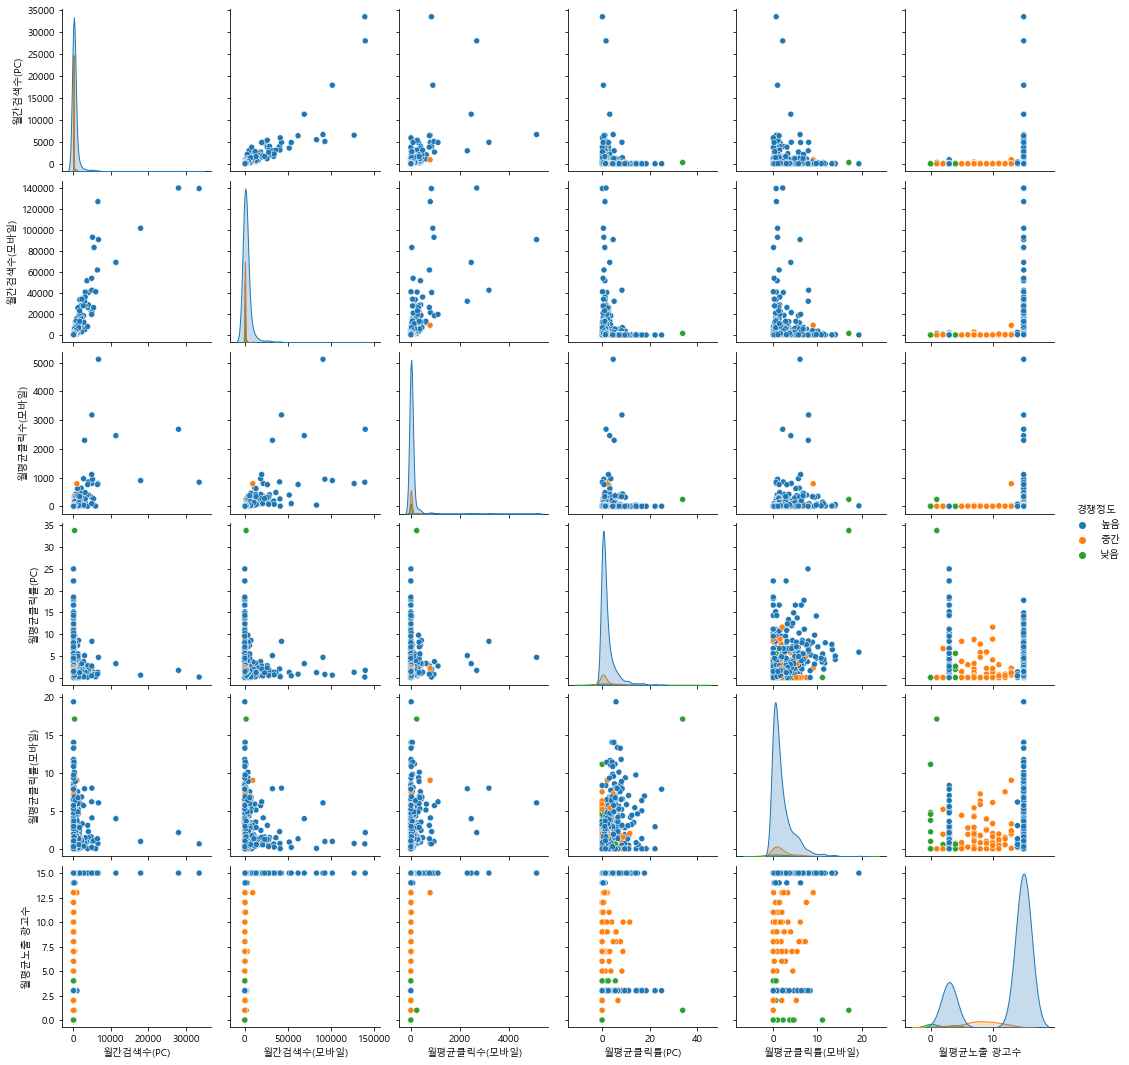

In [4]:
sns.pairplot(df, hue = '경쟁정도')

In [7]:
#빈 값이 있는지 채크
df.isnull().sum()

연관키워드          0
월간검색수(PC)      0
월간검색수(모바일)     0
월평균클릭수(PC)     0
월평균클릭수(모바일)    0
월평균클릭률(PC)     0
월평균클릭률(모바일)    0
경쟁정도           0
월평균노출 광고수      0
dtype: int64

In [12]:
#월평균클릭수(PC)의 타입을 float으로 바꿔주자
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   연관키워드        999 non-null    object 
 1   월간검색수(PC)    999 non-null    int64  
 2   월간검색수(모바일)   999 non-null    int64  
 3   월평균클릭수(PC)   999 non-null    float64
 4   월평균클릭수(모바일)  999 non-null    float64
 5   월평균클릭률(PC)   999 non-null    float64
 6   월평균클릭률(모바일)  999 non-null    float64
 7   경쟁정도         999 non-null    object 
 8   월평균노출 광고수    999 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


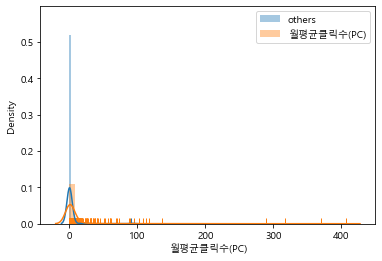

In [27]:
sns.distplot(df[df.경쟁정도 != "높음"]["월평균클릭수(PC)"], hist=True, rug=True, label="others")
sns.distplot(df[df.경쟁정도 == "높음"]["월평균클릭수(PC)"], hist=True, rug=True, label="월평균클릭수(PC)")
plt.legend()#범례
plt.show()

In [58]:
df.drop(columns=['연관키워드'], inplace=True)
df.head()

,월간검색수(PC),월간검색수(모바일),월평균클릭수(PC),월평균클릭수(모바일),월평균클릭률(PC),월평균클릭률(모바일),월평균노출 광고수,경쟁정도
0,4720,22600,112.9,324.8,2.62,1.57,15,1
1,4910,21400,102.8,796.6,2.31,4.07,15,1
2,3960,40400,69.2,848.8,1.98,2.26,15,1
3,6660,90700,289.7,5118.0,4.65,6.05,15,1
4,3800,26200,95.5,753.0,2.72,3.08,15,1


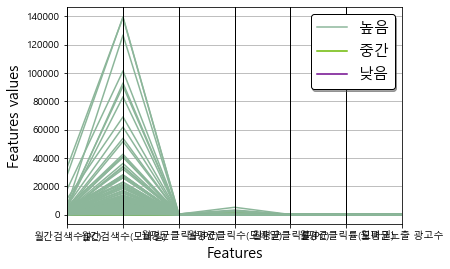

In [38]:
parallel_coordinates(df, "경쟁정도")
plt.xlabel('Features', fontsize=15)#x축 라벨
plt.ylabel('Features values', fontsize=15)# y축 라벨
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   월간검색수(PC)    999 non-null    int64  
 1   월간검색수(모바일)   999 non-null    int64  
 2   월평균클릭수(PC)   999 non-null    float64
 3   월평균클릭수(모바일)  999 non-null    float64
 4   월평균클릭률(PC)   999 non-null    float64
 5   월평균클릭률(모바일)  999 non-null    float64
 6   월평균노출 광고수    999 non-null    int64  
 7   경쟁정도         999 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 62.6 KB


In [46]:
ss = StandardScaler()#표준(평균값 기준)

In [59]:
#표준화 fit_transform
ss.fit_transform(df.iloc[:,:8])

array([[ 2.55997923,  1.77166942,  4.28457604, ..., -0.13563184,
         0.62705711, -0.30136533],
       [ 2.67199185,  1.6633838 ,  3.88295861, ...,  0.8945382 ,
         0.62705711, -0.30136533],
       [ 2.11192872,  3.3779061 ,  2.54688478, ...,  0.14869509,
         0.62705711, -0.30136533],
       ...,
       [-0.13421923, -0.1323527 , -0.11333366, ..., -0.12739048,
         0.62705711, -0.30136533],
       [-0.21675485, -0.2550764 , -0.18490905, ..., -0.66719957,
         0.62705711, -0.30136533],
       [-0.19906865, -0.23793118, -0.18490905, ..., -0.3499072 ,
         0.62705711, -0.30136533]])

In [89]:
X_train,X_test,y_train,y_test = train_test_split(
            df.iloc[:,:7],#문제
            df.iloc[:,7],#정답
            test_size= 0.2,#테스트 비율
            random_state= 40#랜덤 시드 값
)

In [90]:
df.iloc[:,7]

0      1
1      1
2      1
3      1
4      1
      ..
994    1
995    1
996    1
997    1
998    1
Name: 경쟁정도, Length: 999, dtype: int64

In [91]:
print('X_train: ',X_train.shape, 'y_train: ',y_train.shape, 'X_test: ',X_test.shape,'y_test: ',y_test.shape)


X_train:  (799, 7) y_train:  (799,) X_test:  (200, 7) y_test:  (200,)


In [92]:
#값이 골구르 뽑혔는지 판단.
y_test.value_counts()

1    183
2     11
3      6
Name: 경쟁정도, dtype: int64

In [93]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)
X_train_s[:5]

,월간검색수(PC),월간검색수(모바일),월평균클릭수(PC),월평균클릭수(모바일),월평균클릭률(PC),월평균클릭률(모바일),월평균노출 광고수
0,-0.203975,-0.257751,-0.195840,-0.190334,-0.544655,-0.363179,-0.895642
1,-0.210848,-0.231190,-0.174023,-0.168948,0.014459,-0.011572,0.635501
2,0.029682,0.251654,-0.012577,0.064047,-0.221966,-0.208304,0.635501
3,0.737528,1.327381,0.681204,0.353697,-0.148483,-0.384107,0.635501
4,-0.142125,-0.209371,-0.204567,-0.193336,-0.653283,-0.785943,-1.661214


In [94]:
ms = MinMaxScaler()

In [95]:
X_train_m = pd.DataFrame(ms.fit_transform(X_train),columns=X_train.columns)
X_train_m.head()

,월간검색수(PC),월간검색수(모바일),월평균클릭수(PC),월평균클릭수(모바일),월평균클릭률(PC),월평균클릭률(모바일),월평균노출 광고수
0,0.000896,0.000575,0.000541,0.000156,0.0136,0.052169,0.466667
1,0.000597,0.002586,0.001893,0.001270,0.0836,0.095558,1.000000
2,0.011048,0.039155,0.011898,0.013404,0.0540,0.071281,1.000000
3,0.041804,0.120626,0.054895,0.028488,0.0632,0.049587,1.000000
4,0.003583,0.004239,0.000000,0.000000,0.0000,0.000000,0.200000


In [96]:
X_test_m = pd.DataFrame(ms.transform(X_test),columns=X_test.columns)#fit은 위에서 했으니까 안해줘도 됨.
X_test_m[:5]

,월간검색수(PC),월간검색수(모바일),월평균클릭수(PC),월평균클릭수(모바일),월평균클릭률(PC),월평균클릭률(모바일),월평균노출 광고수
0,0.008361,0.020404,0.007572,0.014459,0.0412,0.143595,1.0
1,0.004180,0.014584,0.003245,0.003322,0.0336,0.047004,1.0
2,0.000597,0.002802,0.000270,0.000606,0.0084,0.043388,1.0
3,0.015527,0.028594,0.011087,0.014850,0.0364,0.119318,1.0
4,0.011347,0.012285,0.007301,0.007308,0.0296,0.120351,1.0


In [97]:
##전체로 해보자.
X_test_values = (ms.fit_transform(df.iloc[:,:]))

In [98]:
ms_df =  pd.DataFrame(data=X_test_values, columns=df.columns)
ms_df.head()

,월간검색수(PC),월간검색수(모바일),월평균클릭수(PC),월평균클릭수(모바일),월평균클릭률(PC),월평균클릭률(모바일),월평균노출 광고수,경쟁정도
0,0.140639,0.161715,0.277123,0.063462,0.077446,0.081095,1.0,0.0
1,0.146312,0.153125,0.252332,0.155647,0.068283,0.210227,1.0,0.0
2,0.117946,0.289140,0.169858,0.165846,0.058528,0.116736,1.0,0.0
3,0.198567,0.649223,0.711095,1.000000,0.137452,0.312500,1.0,0.0
4,0.113168,0.187487,0.234413,0.147128,0.080402,0.159091,1.0,0.0


<AxesSubplot:>

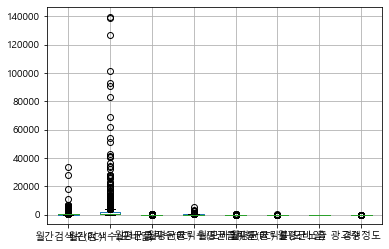

In [99]:
df.boxplot()

In [100]:
##KNeighborsClassifier()메서드와 
## corss_val_score를 사용해보자.
knn = KNeighborsClassifier()

In [101]:
id(knn)#참조형 knn

1791394749024

In [102]:
#훈련을 시켜보자.
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [103]:
#교차검증
#샘플링을 10개해서, 10번 검증을 해보세요.
#X_train을 train+validation data로 나눈다.
#cv(fold값)가 10이면 validation data를 X_train의 1/10로 잡는다.
#validation data의 개수는 12개, 나머지가 train data이다.
scores = cross_val_score(knn,X_train,y_train,cv = 10)#cv=10은 폴드(fold)값!
print(scores)

[0.9125     0.9125     0.9        0.9125     0.925      0.925
 0.9125     0.9125     0.925      0.92405063]


In [104]:
type(scores)#타입은 리스트

numpy.ndarray

In [105]:
np.mean(scores)

0.9161550632911393

In [106]:
def print_metrics(model, x, y, k):
    scores2 = cross_val_score(model, x, y, cv=k) #cv = fold값
    #np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
    print("-------------교차검증 결과-------------\n{}".format(list(scores2)))#값들이 콤마없이 나와서 n{:.5f}이렇게 지정해줄 수 없다.
    acc_mean = np.mean(scores)
    print("-------------교차검증 평균-------------\n{:.5f}".format(acc_mean))
    return scores2, acc

In [107]:
print_metrics(knn,X_train,y_train,5)

-------------교차검증 결과-------------
[0.90625, 0.9, 0.925, 0.9125, 0.9245283018867925]
-------------교차검증 평균-------------
0.91616


NameError: name 'acc' is not defined